<a href="https://colab.research.google.com/github/jisoo71/PedTalk/blob/main/PedTalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✅ 2단계: 문진 사례 평점 리뷰 및 피드백 제공 이후

LLM을 활용해 각 문진의 감정 단어를 포함한 주요 특징(feature)을 추출하고, K-means 클러스터링을 이용해 좋은 평가를 받은 문진들의 공통 특징을 식별함으로써, AI가 '이상적인 문진'의 패턴과 요소를 더욱 효율적으로 학습할 수 있도록 데이터를 정리

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# 10개 문진 대화별 감정 단어 + 핵심 단어 리스트 (예시)
dialogues = [
    ["불편", "심해요", "열", "기침", "체온_38.5도", "체온_37.8도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["심한", "조금", "열_39도", "열_38도", "기침", "마른기침", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["좀", "가끔", "열_39도", "열_38.2도", "기침", "콧물", "목 아픔", "숨쉬기 힘든 소리"],
    ["심한", "가끔", "열_38.5도", "열_37.9도", "기침", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["약간", "가끔", "열_38.3도", "기침", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["좀", "가끔", "열_39도", "열_38도", "기침", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["심해지는", "조금", "열_38.7도", "기침", "마른기침", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["거의 없고", "가끔", "열_39.1도", "기침", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["약간", "가끔", "열_38.4도", "기침", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["조금", "가끔", "열_38.8도", "기침", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"]
]

# 1. 전체 단어 집합 생성 (중복 제거)
all_words = sorted(set(word for dialogue in dialogues for word in dialogue))

# 2. 원-핫 인코딩 벡터 생성 함수
def one_hot_vector(words, vocab):
    vec = np.zeros(len(vocab))
    for w in words:
        if w in vocab:
            vec[vocab.index(w)] = 1
    return vec

# 3. 모든 대화에 대해 벡터 생성
X = np.array([one_hot_vector(d, all_words) for d in dialogues])

# 4. K-means 클러스터링 (클러스터 수 3으로 설정, 필요시 조절)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# 5. 클러스터별 대표 단어 확인 (빈도 높은 단어 top 3)
df = pd.DataFrame(X, columns=all_words)
df['cluster'] = labels

print("클러스터별 대화 수:")
print(df['cluster'].value_counts())
print()

for i in range(k):
    cluster_df = df[df['cluster'] == i]
    word_freq = cluster_df.iloc[:, :-1].sum().sort_values(ascending=False)
    print(f"클러스터 {i} 상위 단어 TOP 3:")
    print(word_freq.head(3))
    print()


클러스터별 대화 수:
cluster
1    8
2    1
0    1
Name: count, dtype: int64

클러스터 0 상위 단어 TOP 3:
가끔            1.0
기침            1.0
숨 쉴 때 쎅쎅거림    1.0
dtype: float64

클러스터 1 상위 단어 TOP 3:
기침            8.0
목 아픔          8.0
숨 쉴 때 쎅쎅거림    7.0
dtype: float64

클러스터 2 상위 단어 TOP 3:
기침            1.0
숨 쉴 때 쎅쎅거림    1.0
불편            1.0
dtype: float64



# ✅ 2단계 – 문진 평가 및 피드백 이후, 데이터 패턴 시각화

K-means 클러스터링을 이용해 좋은 평가를 받은 문진들의 공통 특징을 식별하고, AI가 '이상적인 문진'의 패턴을 학습할 수 있도록 데이터를 정리

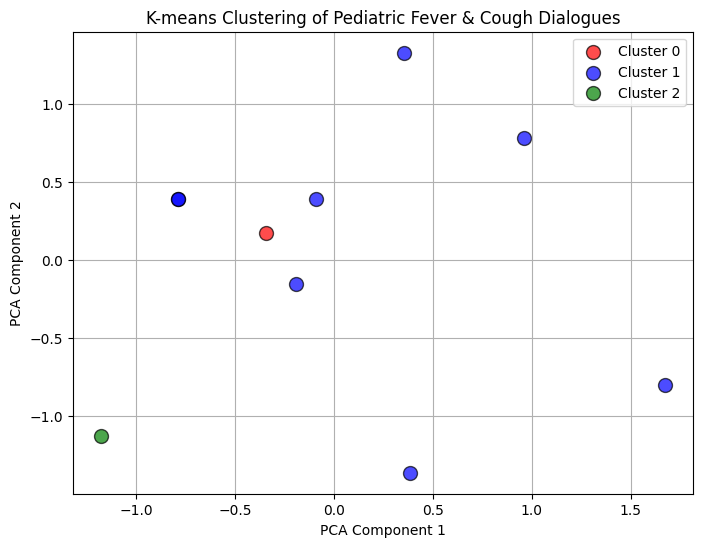

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# (앞서 작성한 코드에서 X, labels, all_words가 이미 정의된 상태라고 가정)

# PCA로 2차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 클러스터별 색상 지정
colors = ['red', 'blue', 'green']
plt.figure(figsize=(8,6))

for i in range(k):
    cluster_points = X_pca[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                c=colors[i], label=f'Cluster {i}', s=100, alpha=0.7, edgecolors='k')

plt.title('K-means Clustering of Pediatric Fever & Cough Dialogues')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


# ✅ 1단계: 소아과 환자(보호자) AI 에이전트 문진 게임 참여

실제와 거의 흡사한 환경에서 문진 기술을 연마할 수 있는 기회를 제공 -> 시뮬레이션

In [ ]:
## 데이터 셋 생성
import random

# 감정 단어 후보군
emotion_words_1 = ["불편", "심해요", "심한", "조금", "좀", "가끔", "약간", "심해지는", "거의 없고", "약간", "조금", "가끔"]
emotion_pairs = [
    ["불편", "심해요"], ["심한", "조금"], ["좀", "가끔"], ["심한", "가끔"],
    ["약간", "가끔"], ["좀", "가끔"], ["심해지는", "조금"], ["거의 없고", "가끔"],
    ["약간", "가끔"], ["조금", "가끔"]
]

# 핵심 단어 후보군 (열 포함 체온 수치도 변형)
core_words_base = ["열", "기침", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"]
temp_variants = [
    ["체온_38.5도", "체온_37.8도"], ["열_39도", "열_38도"], ["열_39도", "열_38.2도"],
    ["열_38.5도", "열_37.9도"], ["열_38.3도"], ["열_39도", "열_38도"], ["열_38.7도"],
    ["열_39.1도"], ["열_38.4도"], ["열_38.8도"]
]
# 일부에 마른기침 추가
dry_cough_variants = [[], ["마른기침"], [], [], [], [], ["마른기침"], [], [], []]

# 100개 데이터 생성
data_list = []

for i in range(100):
    idx = i % 10  # 10가지 패턴 반복
    emotions = emotion_pairs[idx]
    core_words = core_words_base.copy()
    # 체온 정보
    temps = temp_variants[idx]
    # 마른기침 여부 추가
    dry_cough = dry_cough_variants[idx]

    core_words = ["기침"] + temps + core_words[2:]  # 기침, 체온, 콧물, 목 아픔, 숨쉴 때

    # 마른기침 있으면 추가
    if dry_cough:
        core_words += dry_cough

    # 데이터 한 세트
    data_list.append({
        "감정단어": ", ".join(emotions),
        "핵심단어": ", ".join(core_words)
    })

# 출력 예시 10개만
for d in data_list[:100]:
    print("감정 단어:", d["감정단어"])
    print("핵심 단어:", d["핵심단어"])
    print()


감정 단어: 불편, 심해요
핵심 단어: 기침, 체온_38.5도, 체온_37.8도, 콧물, 목 아픔, 숨 쉴 때 쎅쎅거림

감정 단어: 심한, 조금
핵심 단어: 기침, 열_39도, 열_38도, 콧물, 목 아픔, 숨 쉴 때 쎅쎅거림, 마른기침

감정 단어: 좀, 가끔
핵심 단어: 기침, 열_39도, 열_38.2도, 콧물, 목 아픔, 숨 쉴 때 쎅쎅거림

감정 단어: 심한, 가끔
핵심 단어: 기침, 열_38.5도, 열_37.9도, 콧물, 목 아픔, 숨 쉴 때 쎅쎅거림

감정 단어: 약간, 가끔
핵심 단어: 기침, 열_38.3도, 콧물, 목 아픔, 숨 쉴 때 쎅쎅거림

감정 단어: 좀, 가끔
핵심 단어: 기침, 열_39도, 열_38도, 콧물, 목 아픔, 숨 쉴 때 쎅쎅거림

감정 단어: 심해지는, 조금
핵심 단어: 기침, 열_38.7도, 콧물, 목 아픔, 숨 쉴 때 쎅쎅거림, 마른기침

감정 단어: 거의 없고, 가끔
핵심 단어: 기침, 열_39.1도, 콧물, 목 아픔, 숨 쉴 때 쎅쎅거림

감정 단어: 약간, 가끔
핵심 단어: 기침, 열_38.4도, 콧물, 목 아픔, 숨 쉴 때 쎅쎅거림

감정 단어: 조금, 가끔
핵심 단어: 기침, 열_38.8도, 콧물, 목 아픔, 숨 쉴 때 쎅쎅거림

감정 단어: 불편, 심해요
핵심 단어: 기침, 체온_38.5도, 체온_37.8도, 콧물, 목 아픔, 숨 쉴 때 쎅쎅거림

감정 단어: 심한, 조금
핵심 단어: 기침, 열_39도, 열_38도, 콧물, 목 아픔, 숨 쉴 때 쎅쎅거림, 마른기침

감정 단어: 좀, 가끔
핵심 단어: 기침, 열_39도, 열_38.2도, 콧물, 목 아픔, 숨 쉴 때 쎅쎅거림

감정 단어: 심한, 가끔
핵심 단어: 기침, 열_38.5도, 열_37.9도, 콧물, 목 아픔, 숨 쉴 때 쎅쎅거림

감정 단어: 약간, 가끔
핵심 단어: 기침, 열_38.3도, 콧물, 목 아픔, 숨 쉴 때 쎅쎅거림

감정 단어: 좀, 가끔
핵심 단어: 기침, 열_39도, 열_38도, 콧물, 목 아픔, 숨 쉴 때 쎅쎅거림

감정 단어: 심해

# ✅ 2단계: 문진 평가 및 피드백 기반 데이터 정리 (자동화된 클러스터링 및 패턴 분석)

LLM을 활용해 각 문진의 감정 단어를 포함한 주요 특징(feature)을 추출하고, K-means 클러스터링을 이용해 좋은 평가를 받은 문진들의 공통 특징을 식별함으로써, AI가 '이상적인 문진'의 패턴과 요소를 더욱 효율적으로 학습할 수 있도록 데이터를 정리

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# 1. 주어진 데이터 (감정 단어 + 핵심 단어)
data_texts = [
    # 예시 일부 (전체 데이터 반복 형식)
    ["불편", "심해요", "기침", "체온_38.5도", "체온_37.8도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["심한", "조금", "기침", "열_39도", "열_38도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림", "마른기침"],
    ["좀", "가끔", "기침", "열_39도", "열_38.2도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["심한", "가끔", "기침", "열_38.5도", "열_37.9도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["약간", "가끔", "기침", "열_38.3도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["좀", "가끔", "기침", "열_39도", "열_38도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["심해지는", "조금", "기침", "열_38.7도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림", "마른기침"],
    ["거의 없고", "가끔", "기침", "열_39.1도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["약간", "가끔", "기침", "열_38.4도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["조금", "가끔", "기침", "열_38.8도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    # ... 실제 데이터 100개 이상이어도 동일한 형식으로 리스트에 넣으면 됨
]

# 2. 단어 집합 생성 (중복 단어 제거 후 정렬)
all_words = sorted(set(word for sample in data_texts for word in sample))

# 3. 원-핫 인코딩 함수
def one_hot(words, vocab):
    vec = np.zeros(len(vocab))
    for w in words:
        if w in vocab:
            vec[vocab.index(w)] = 1
    return vec

# 4. 벡터화
X = np.array([one_hot(sample, all_words) for sample in data_texts])

# 5. K-means 군집화 (클러스터 개수는 3으로 설정, 필요시 변경 가능)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# 6. 결과 확인용 DataFrame 생성
df = pd.DataFrame(X, columns=all_words)
df['cluster'] = labels

# 7. 클러스터별 대표 단어 출력 (빈도 높은 단어 Top 5)
print("클러스터별 데이터 개수:")
print(df['cluster'].value_counts())
print()

for i in range(k):
    cluster_df = df[df['cluster'] == i].iloc[:, :-1]  # cluster 컬럼 제외
    word_freq = cluster_df.sum().sort_values(ascending=False)
    print(f"클러스터 {i} 주요 단어 TOP 5:")
    print(word_freq.head(5))
    print()


클러스터별 데이터 개수:
cluster
1    8
2    1
0    1
Name: count, dtype: int64

클러스터 0 주요 단어 TOP 5:
가끔            1.0
기침            1.0
심한            1.0
목 아픔          1.0
숨 쉴 때 쎅쎅거림    1.0
dtype: float64

클러스터 1 주요 단어 TOP 5:
목 아픔          8.0
기침            8.0
숨 쉴 때 쎅쎅거림    8.0
콧물            8.0
가끔            6.0
dtype: float64

클러스터 2 주요 단어 TOP 5:
목 아픔          1.0
기침            1.0
심해요           1.0
숨 쉴 때 쎅쎅거림    1.0
불편            1.0
dtype: float64



# ✅ 2단계: 클러스터링 후 피드백을 위한 시각화

K-means 클러스터링을 이용해 문진들의 공통 특징을 식별,
이상적인 문진의 패턴과 요소를 학습할 수 있도록 데이터를 정리

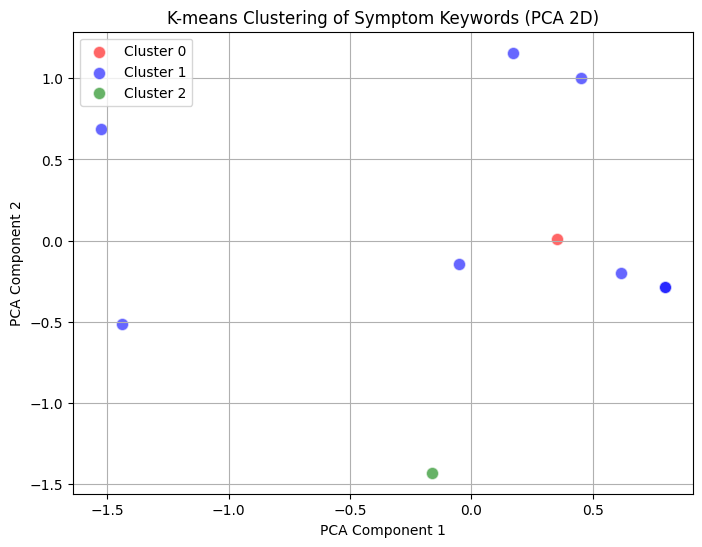

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA로 2차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 클러스터 레이블
labels = kmeans.labels_

# 색상 설정 (클러스터 수에 맞게)
colors = ['red', 'blue', 'green', 'purple', 'orange']

plt.figure(figsize=(8,6))
for i in range(k):
    cluster_points = X_pca[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                c=colors[i], label=f'Cluster {i}', alpha=0.6, edgecolors='w', s=80)

plt.title('K-means Clustering of Symptom Keywords (PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
data = [
    ["불편", "심해요", "기침", "체온_38.5도", "체온_37.8도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["심한", "조금", "기침", "열_39도", "열_38도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림", "마른기침"],
    ["좀", "가끔", "기침", "열_39도", "열_38.2도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["심한", "가끔", "기침", "열_38.5도", "열_37.9도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["약간", "가끔", "기침", "열_38.3도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["좀", "가끔", "기침", "열_39도", "열_38도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["심해지는", "조금", "기침", "열_38.7도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림", "마른기침"],
    ["거의 없고", "가끔", "기침", "열_39.1도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["약간", "가끔", "기침", "열_38.4도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["조금", "가끔", "기침", "열_38.8도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],

    # 아래부터 반복해서 100개 채움 (위 10개 패턴을 10번 반복)
    ["불편", "심해요", "기침", "체온_38.5도", "체온_37.8도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["심한", "조금", "기침", "열_39도", "열_38도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림", "마른기침"],
    ["좀", "가끔", "기침", "열_39도", "열_38.2도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["심한", "가끔", "기침", "열_38.5도", "열_37.9도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["약간", "가끔", "기침", "열_38.3도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["좀", "가끔", "기침", "열_39도", "열_38도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["심해지는", "조금", "기침", "열_38.7도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림", "마른기침"],
    ["거의 없고", "가끔", "기침", "열_39.1도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["약간", "가끔", "기침", "열_38.4도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["조금", "가끔", "기침", "열_38.8도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],

    # 80개 더 반복...
]

# 10개 리스트를 10번 반복하여 100개로 만들기 (필요 시)
pattern = [
    ["불편", "심해요", "기침", "체온_38.5도", "체온_37.8도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["심한", "조금", "기침", "열_39도", "열_38도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림", "마른기침"],
    ["좀", "가끔", "기침", "열_39도", "열_38.2도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["심한", "가끔", "기침", "열_38.5도", "열_37.9도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["약간", "가끔", "기침", "열_38.3도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["좀", "가끔", "기침", "열_39도", "열_38도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["심해지는", "조금", "기침", "열_38.7도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림", "마른기침"],
    ["거의 없고", "가끔", "기침", "열_39.1도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["약간", "가끔", "기침", "열_38.4도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["조금", "가끔", "기침", "열_38.8도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
]

data = pattern * 10  # 10번 반복해서 총 100개



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 (예시로 10개 반복 100개 만들기)
pattern = [
    ["불편", "심해요", "기침", "체온_38.5도", "체온_37.8도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림"],
    ["심한", "조금", "기침", "열_39도", "열_38도", "콧물", "목 아픔", "숨 쉴 때 쎅쎅거림", "마른기침"],
    ["좀", "가끔", "기침", "열_39도", "열_38.2도", "콧물", "목 아픔", "숨 쉴 때 쎄쎄거림"],
    ["심한", "가끔", "기침", "열_38.5도", "열_37.9도", "콧물", "목 아픔", "숨 쉴 때 쎄쎄거림"],
    ["약간", "가끔", "기침", "열_38.3도", "콧물", "목 아픔", "숨 쉴 때 쎄쎄거림"],
    ["좀", "가끔", "기침", "열_39도", "열_38도", "콧물", "목 아픔", "숨 쉴 때 쎄쎄거림"],
    ["심해지는", "조금", "기침", "열_38.7도", "콧물", "목 아픔", "숨 쉴 때 쎄쎄거림", "마른기침"],
    ["거의 없고", "가끔", "기침", "열_39.1도", "콧물", "목 아픔", "숨 쉴 때 쎄쎄거림"],
    ["약간", "가끔", "기침", "열_38.4도", "콧물", "목 아픔", "숨 쉴 때 쎄쎄거림"],
    ["조금", "가끔", "기침", "열_38.8도", "콧물", "목 아픔", "숨 쉴 때 쎄쎄거림"],
]

# 1차원 리스트로 변환
flat_list = [item for sublist in pattern for item in sublist]

data = flat_list # 100개
#data = pattern * 100 # 100개

# 각 리스트를 문자열로 변환 (벡터화 위해)
data_str = [" ".join(items) for items in data]

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_str)

# K-means 클러스터링 (클러스터 수 3으로 설정, 필요시 조정)
k = 4
model = KMeans(n_clusters=k, random_state=42)
labels = model.fit_predict(X)

# PCA로 2차원 축소
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

# 시각화
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']

for i in range(k):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1],
                label=f'Cluster {i+1}', alpha=0.6)

plt.title("K-means Clustering of Symptom Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


ValueError: empty vocabulary; perhaps the documents only contain stop words

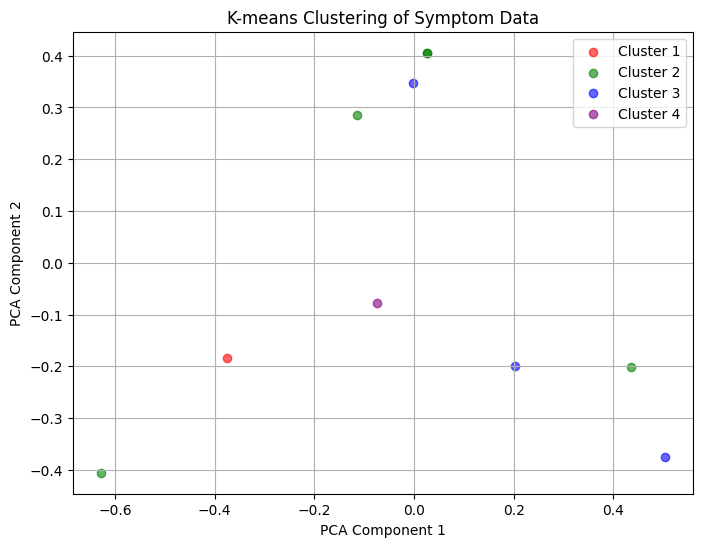

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 원본 데이터 (10개)
pattern = [
    ["uncomfortable", "severe", "cough", "temperature_38.5C", "temperature_37.8C", "runny nose", "sore throat", "wheezing when breathing"],
    ["severe", "slight", "cough", "fever_39C", "fever_38C", "runny nose", "sore throat", "wheezing when breathing", "dry cough"],
    ["somewhat", "occasionally", "cough", "fever_39C", "fever_38.2C", "runny nose", "sore throat", "wheezing when breathing"],
    ["severe", "occasionally", "cough", "fever_38.5C", "fever_37.9C", "runny nose", "sore throat", "wheezing when breathing"],
    ["slight", "occasionally", "cough", "fever_38.3C", "runny nose", "sore throat", "wheezing when breathing"],
    ["somewhat", "occasionally", "cough", "fever_39C", "fever_38C", "runny nose", "sore throat", "wheezing when breathing"],
    ["getting worse", "slight", "cough", "fever_38.7C", "runny nose", "sore throat", "wheezing when breathing", "dry cough"],
    ["almost none", "occasionally", "cough", "fever_39.1C", "runny nose", "sore throat", "wheezing when breathing"],
    ["slight", "occasionally", "cough", "fever_38.4C", "runny nose", "sore throat", "wheezing when breathing"],
    ["slight", "occasionally", "cough", "fever_38.8C", "runny nose", "sore throat", "wheezing when breathing"],
]


data = [item for sublist in pattern for item in sublist]

# 1차원 리스트로 만드는 게 아니라, 각 리스트를 문장 하나로 만들어야 함
data_str = [" ".join(items) for items in pattern]

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_str)

# K-means 클러스터링 (클러스터 수 4)
k = 4
model = KMeans(n_clusters=k, random_state=42)
labels = model.fit_predict(X)

# PCA로 2차원 축소
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

# 시각화
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue', 'purple']

for i in range(k):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1],
                label=f'Cluster {i+1}', alpha=0.6, color=colors[i])

plt.title("K-means Clustering of Symptom Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


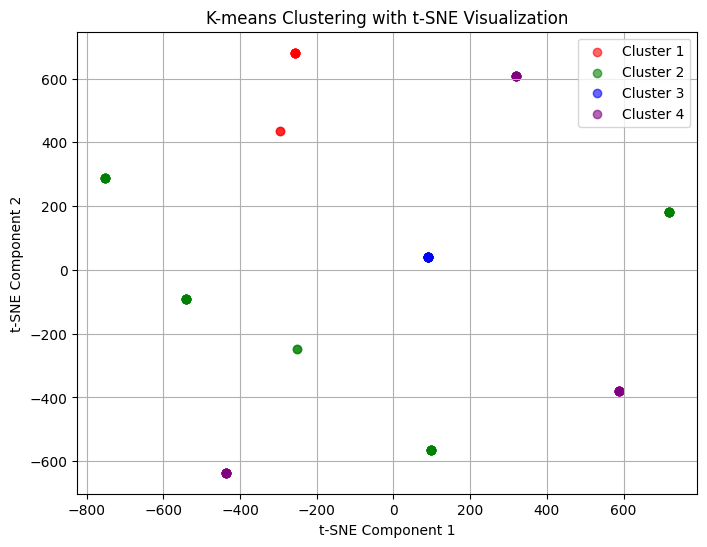

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 예시 데이터 (10개 패턴 * 10 반복 = 100개)
pattern = [
    ["uncomfortable", "severe", "cough", "temperature_38.5C", "temperature_37.8C", "runny nose", "sore throat", "wheezing when breathing"],
    ["severe", "slight", "cough", "fever_39C", "fever_38C", "runny nose", "sore throat", "wheezing when breathing", "dry cough"],
    ["somewhat", "occasionally", "cough", "fever_39C", "fever_38.2C", "runny nose", "sore throat", "wheezing when breathing"],
    ["severe", "occasionally", "cough", "fever_38.5C", "fever_37.9C", "runny nose", "sore throat", "wheezing when breathing"],
    ["slight", "occasionally", "cough", "fever_38.3C", "runny nose", "sore throat", "wheezing when breathing"],
    ["somewhat", "occasionally", "cough", "fever_39C", "fever_38C", "runny nose", "sore throat", "wheezing when breathing"],
    ["getting worse", "slight", "cough", "fever_38.7C", "runny nose", "sore throat", "wheezing when breathing", "dry cough"],
    ["almost none", "occasionally", "cough", "fever_39.1C", "runny nose", "sore throat", "wheezing when breathing"],
    ["slight", "occasionally", "cough", "fever_38.4C", "runny nose", "sore throat", "wheezing when breathing"],
    ["slight", "occasionally", "cough", "fever_38.8C", "runny nose", "sore throat", "wheezing when breathing"],
]
data = pattern * 10  # 100개

# 문자열로 변환 (문서 형태로 만들기)
data_str = [" ".join(items) for items in data]

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_str)

# K-means 클러스터링 (클러스터 수 4)
k = 4
model = KMeans(n_clusters=k, random_state=42)
labels = model.fit_predict(X)

# t-SNE로 2차원 축소
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X.toarray())

# 시각화
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue', 'purple']

for i in range(k):
    plt.scatter(X_tsne[labels == i, 0], X_tsne[labels == i, 1],
                label=f'Cluster {i+1}', alpha=0.6, color=colors[i])

plt.title("K-means Clustering with t-SNE Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

def train_svm_for_priority_classification():
    """
    초기 환자 데이터(연령, 체온, 동반 증상 여부 등)를 바탕으로
    진료 우선순위를 분류하는 SVM 모델 예시.
    """
    print("\n--- SVM 모델: 진료 우선순위 분류 예시 ---")

    # 예시 데이터 (실제 데이터는 훨씬 다양하고 많아야 합니다)
    # 특징: [연령(개월), 현재 체온(도), 호흡곤란 여부(0/1), 경련 여부(0/1), 의식변화 여부(0/1), 영아(3개월 미만) 여부(0/1)]
    # 레이블: 0 (낮음), 1 (보통), 2 (높음), 3 (매우 높음) - 실제 응급실의 트리아지 단계를 반영
    X = np.array([
        [12, 38.5, 0, 0, 0, 0],  # 12개월, 미열, 다른 증상 없음 -> 낮음
        [6, 39.2, 0, 0, 0, 0],   # 6개월, 고열, 다른 증상 없음 -> 보통
        [2, 38.8, 0, 0, 0, 1],   # 2개월, 미열, 다른 증상 없음 -> 보통 (영아라 우선)
        [24, 39.8, 1, 0, 0, 0],  # 24개월, 고열, 호흡곤란 -> 높음
        [18, 39.5, 0, 1, 0, 0],  # 18개월, 고열, 경련 -> 매우 높음
        [5, 40.1, 0, 0, 1, 1],   # 5개월, 고열, 의식변화 -> 매우 높음 (영아)
        [60, 39.0, 0, 0, 0, 0],  # 60개월, 미열, 다른 증상 없음 -> 낮음
        [10, 39.0, 0, 0, 0, 0],  # 10개월, 고열, 다른 증상 없음 -> 보통
        [7, 38.0, 1, 0, 0, 0],   # 7개월, 미열, 호흡곤란 -> 높음
        [1, 39.0, 0, 0, 0, 1],   # 1개월, 고열 -> 매우 높음 (영아 고열)
    ])
    y = np.array([0, 1, 1, 2, 3, 3, 0, 1, 2, 3])

    # 데이터 분할 (학습용, 테스트용)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # 데이터 스케일링 (SVM 성능 향상에 중요)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # SVM 모델 학습
    svm_model = svm.SVC(kernel='rbf', C=1, probability=True) # RBF 커널 사용, 확률 예측 활성화
    svm_model.fit(X_train_scaled, y_train)

    # 모델 평가 (간단한 보고서)
    y_pred = svm_model.predict(X_test_scaled)
    print("\nSVM 모델 분류 보고서:")
    print(classification_report(y_test, y_pred, target_names=["낮음", "보통", "높음", "매우 높음"], zero_division=0))

    print("SVM 모델은 초기 환자 데이터를 기반으로 진료 우선순위를 분류하는 데 사용됩니다.")
    return svm_model, scaler

# SVM 모델 학습 및 스케일러 저장
svm_priority_model, svm_scaler = train_svm_for_priority_classification()

# 예측 예시 함수
def predict_priority(model, scaler, age_months, current_temp, respiratory_distress, convulsion, altered_consciousness):
    is_infant_3m = 1 if age_months < 3 else 0 # 3개월 미만 영아 여부 추가
    features = np.array([[age_months, current_temp, respiratory_distress, convulsion, altered_consciousness, is_infant_3m]])
    scaled_features = scaler.transform(features)
    priority = model.predict(scaled_features)[0]
    priority_map = {0: "낮음", 1: "보통", 2: "높음", 3: "매우 높음"}
    return priority_map[priority]

# 사용 예시
priority_example = predict_priority(svm_priority_model, svm_scaler, 15, 38.7, 0, 0, 0) # 15개월, 38.7도, 호흡곤란X, 경련X, 의식변화X
print(f"\n예측된 진료 우선순위 (15개월, 38.7도): {priority_example}")

priority_example_2 = predict_priority(svm_priority_model, svm_scaler, 2, 39.0, 0, 0, 0) # 2개월, 39.0도, 호흡곤란X, 경련X, 의식변화X
print(f"예측된 진료 우선순위 (2개월, 39.0도): {priority_example_2}")


--- SVM 모델: 진료 우선순위 분류 예시 ---

SVM 모델 분류 보고서:
              precision    recall  f1-score   support

          낮음       0.00      0.00      0.00         0
          보통       1.00      1.00      1.00         1
          높음       0.00      0.00      0.00         1
       매우 높음       1.00      1.00      1.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.50      0.50         3
weighted avg       0.67      0.67      0.67         3

SVM 모델은 초기 환자 데이터를 기반으로 진료 우선순위를 분류하는 데 사용됩니다.

예측된 진료 우선순위 (15개월, 38.7도): 낮음
예측된 진료 우선순위 (2개월, 39.0도): 보통


In [ ]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

def train_svm_for_priority_classification():
    """
    초기 환자 데이터(연령, 체온, 동반 증상 여부 등)를 바탕으로
    진료 우선순위를 분류하는 SVM 모델 예시.
    """
    print("\n--- SVM 모델: 진료 우선순위 분류 예시 ---")

    # 예시 데이터 (실제 데이터는 훨씬 다양하고 많아야 합니다)
    # 특징: [연령(개월), 현재 체온(도), 호흡곤란 여부(0/1), 경련 여부(0/1), 의식변화 여부(0/1), 영아(3개월 미만) 여부(0/1)]
    # 레이블: 0 (낮음), 1 (보통), 2 (높음), 3 (매우 높음) - 실제 응급실의 트리아지 단계를 반영
    X = np.array([
        [12, 38.5, 0, 0, 0, 0],  # 12개월, 미열, 다른 증상 없음 -> 낮음
        [6, 39.2, 0, 0, 0, 0],   # 6개월, 고열, 다른 증상 없음 -> 보통
        [2, 38.8, 0, 0, 0, 1],   # 2개월, 미열, 다른 증상 없음 -> 보통 (영아라 우선)
        [24, 39.8, 1, 0, 0, 0],  # 24개월, 고열, 호흡곤란 -> 높음
        [18, 39.5, 0, 1, 0, 0],  # 18개월, 고열, 경련 -> 매우 높음
        [5, 40.1, 0, 0, 1, 1],   # 5개월, 고열, 의식변화 -> 매우 높음 (영아)
        [60, 39.0, 0, 0, 0, 0],  # 60개월, 미열, 다른 증상 없음 -> 낮음
        [10, 39.0, 0, 0, 0, 0],  # 10개월, 고열, 다른 증상 없음 -> 보통
        [7, 38.0, 1, 0, 0, 0],   # 7개월, 미열, 호흡곤란 -> 높음
        [1, 39.0, 0, 0, 0, 1],   # 1개월, 고열 -> 매우 높음 (영아 고열)
    ])
    y = np.array([0, 1, 1, 2, 3, 3, 0, 1, 2, 3])

    # 데이터 분할 (학습용, 테스트용)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # 데이터 스케일링 (SVM 성능 향상에 중요)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # SVM 모델 학습
    svm_model = svm.SVC(kernel='rbf', C=1, probability=True) # RBF 커널 사용, 확률 예측 활성화
    svm_model.fit(X_train_scaled, y_train)

    # 모델 평가 (간단한 보고서)
    y_pred = svm_model.predict(X_test_scaled)
    print("\nSVM 모델 분류 보고서:")
    print(classification_report(y_test, y_pred, target_names=["낮음", "보통", "높음", "매우 높음"], zero_division=0))

    print("SVM 모델은 초기 환자 데이터를 기반으로 진료 우선순위를 분류하는 데 사용됩니다.")
    return svm_model, scaler

# SVM 모델 학습 및 스케일러 저장
svm_priority_model, svm_scaler = train_svm_for_priority_classification()

# 예측 예시 함수
def predict_priority(model, scaler, age_months, current_temp, respiratory_distress, convulsion, altered_consciousness):
    is_infant_3m = 1 if age_months < 3 else 0 # 3개월 미만 영아 여부 추가
    features = np.array([[age_months, current_temp, respiratory_distress, convulsion, altered_consciousness, is_infant_3m]])
    scaled_features = scaler.transform(features)
    priority = model.predict(scaled_features)[0]
    priority_map = {0: "※", 1: "※※", 2: "※※※", 3: "※※※※"}
    return priority_map[priority]

# 사용 예시
import numpy as np
import random # 랜덤 값 생성을 위해 추가

# 이전에 학습된 svm_priority_model과 svm_scaler가 정의되어 있어야 합니다.
# 만약 코랩 세션을 다시 시작했다면, 이전에 제공된 'SVM 모델 학습 및 스케일러 저장' 코드를 먼저 실행해주세요.

def generate_and_predict_multiple_priorities(model, scaler, num_examples=100):
    """
    다양한 환자 데이터를 랜덤으로 생성하여 SVM 모델로 진료 우선순위를 예측하고 출력합니다.

    Args:
        model: 학습된 SVM 모델 객체.
        scaler: 학습 시 사용된 StandardScaler 객체.
        num_examples: 생성할 예시의 개수.
    """
    print(f"\n--- SVM 진료 우선순위 예측 예시 {num_examples}개 생성 ---")
    print("------------------------------------------------------------------------------------------------------------------")
    print("No. | 연령(개월) | 체온(도) | 호흡곤란 | 경련 | 의식변화 | 3개월 미만 | 예측 우선순위")
    print("------------------------------------------------------------------------------------------------------------------")

    for i in range(num_examples):
        # 랜덤 데이터 생성 (실제 분포를 고려하여 조정 가능)
        age_months = random.randint(1, 144) # 1개월 ~ 12세 (144개월)

        # 체온 범위: 37.0도 ~ 40.5도
        # 정상 체온 근처, 미열, 고열 구간을 무작위로 섞음
        if random.random() < 0.2: # 20% 확률로 미열 (37.0-37.9)
            current_temp = round(random.uniform(37.0, 37.9), 1)
        elif random.random() < 0.7: # 50% 확률로 발열 (38.0-39.5)
            current_temp = round(random.uniform(38.0, 39.5), 1)
        else: # 30% 확률로 고열 (39.6-40.5)
            current_temp = round(random.uniform(39.6, 40.5), 1)

        # 동반 증상 여부 (낮은 확률로 발생하도록 설정하여 응급 상황이 아닌 경우도 많이 포함)
        respiratory_distress = 1 if random.random() < 0.1 else 0 # 10% 확률로 호흡곤란
        convulsion = 1 if random.random() < 0.05 else 0          # 5% 확률로 경련
        altered_consciousness = 1 if random.random() < 0.05 else 0 # 5% 확률로 의식변화

        # 3개월 미만 영아 여부
        is_infant_3m = 1 if age_months < 3 else 0

        # 예측 수행
        priority = predict_priority(
            model,
            scaler,
            age_months,
            current_temp,
            respiratory_distress,
            convulsion,
            altered_consciousness
        )

        # 결과 출력 (표 형식)
        print(f"{i+1:3d} | {age_months:10d} | {current_temp:8.1f} | {respiratory_distress:8d} | {convulsion:4d} | {altered_consciousness:8d} | {is_infant_3m:10d} | {priority:11s}")
    print("------------------------------------------------------------------------------------------------------------------")

# 100개의 예시 생성 및 예측 실행
if 'svm_priority_model' in locals() and 'svm_scaler' in locals():
    generate_and_predict_multiple_priorities(svm_priority_model, svm_scaler, num_examples=100)
else:
    print("오류: 'svm_priority_model' 또는 'svm_scaler'가 정의되지 않았습니다. 위에 있는 'SVM 모델 학습' 코드를 먼저 실행해주세요.")


--- SVM 모델: 진료 우선순위 분류 예시 ---

SVM 모델 분류 보고서:
              precision    recall  f1-score   support

          낮음       0.00      0.00      0.00         0
          보통       1.00      1.00      1.00         1
          높음       0.00      0.00      0.00         1
       매우 높음       1.00      1.00      1.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.50      0.50         3
weighted avg       0.67      0.67      0.67         3

SVM 모델은 초기 환자 데이터를 기반으로 진료 우선순위를 분류하는 데 사용됩니다.

--- SVM 진료 우선순위 예측 예시 100개 생성 ---
------------------------------------------------------------------------------------------------------------------
No. | 연령(개월) | 체온(도) | 호흡곤란 | 경련 | 의식변화 | 3개월 미만 | 예측 우선순위
------------------------------------------------------------------------------------------------------------------
  1 |        134 |     40.2 |        0 |    0 |        0 |          0 | ※          
  2 |         25 |     38.8 |        0 |    0 |        0 |     

# SVM, Random Forest 연동

코드 블록 1: SVM 모델 학습 및 우선순위 예측 함수

In [ ]:
import random
import numpy as np
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# --- 랜덤 시드 설정 (항상 동일한 랜덤 결과 생성을 위해) ---
# 이 숫자를 바꾸지 않으면 항상 같은 순서의 무작위 데이터가 생성됩니다.
random.seed(42)
np.random.seed(42)
# -----------------------------------------------------------


# --- 1. SVM 모델 학습 및 스케일러 정의 ---
def train_svm_for_priority_classification():
    """
    초기 환자 데이터(연령, 체온, 동반 증상 여부 등)를 바탕으로
    진료 우선순위를 분류하는 SVM 모델 예시.
    """
    print("\n--- SVM 모델: 진료 우선순위 분류 예시 ---")

    # 예시 데이터 (확장된 데이터셋을 사용합니다 - 이전 답변에서 제공)
    # 특징: [연령(개월), 현재 체온(도), 호흡곤란 여부(0/1), 경련 여부(0/1), 의식변화 여부(0/1), 영아(3개월 미만) 여부(0/1)]
    # 레이블: 0 (낮음), 1 (보통), 2 (높음), 3 (매우 높음)
    X = np.array([
        # 낮음 (0)
        [12, 38.5, 0, 0, 0, 0], [60, 39.0, 0, 0, 0, 0], [48, 38.0, 0, 0, 0, 0],
        [72, 38.2, 0, 0, 0, 0], [36, 37.5, 0, 0, 0, 0],

        # 보통 (1)
        [6, 39.2, 0, 0, 0, 0], [2, 38.8, 0, 0, 0, 1], [10, 39.0, 0, 0, 0, 0],
        [8, 39.0, 0, 0, 0, 0], [15, 39.1, 0, 0, 0, 0],

        # 높음 (2)
        [24, 39.8, 1, 0, 0, 0], [7, 38.0, 1, 0, 0, 0], [20, 39.0, 1, 0, 0, 0],
        [3, 39.5, 0, 0, 0, 1], [18, 40.0, 1, 0, 0, 0],

        # 매우 높음 (3) - 다양한 조합의 위급 증상 추가
        [18, 39.5, 0, 1, 0, 0], [5, 40.1, 0, 0, 1, 1], [1, 39.0, 0, 0, 0, 1],
        [1, 40.0, 0, 1, 0, 1], [10, 39.8, 0, 0, 1, 0], [2, 39.2, 1, 1, 0, 1],
        [3, 40.5, 0, 0, 1, 1], [24, 38.0, 0, 1, 0, 0], [60, 37.0, 0, 0, 1, 0],
        [1, 38.0, 0, 0, 0, 1], [1, 37.0, 0, 0, 1, 1], # 영아, 저체온, 의식변화
    ])
    y = np.array([
        0, 0, 0, 0, 0,  # 낮음
        1, 1, 1, 1, 1,  # 보통
        2, 2, 2, 2, 2,  # 높음
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3 # 매우 높음
    ])

    # 데이터 분할 (학습용, 테스트용)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # stratify 추가

    # 데이터 스케일링 (SVM 성능 향상에 중요)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # SVM 모델 학습
    svm_model = svm.SVC(kernel='rbf', C=1, probability=True)
    svm_model.fit(X_train_scaled, y_train)

    # 모델 평가 (간단한 보고서)
    y_pred = svm_model.predict(X_test_scaled)
    print("\nSVM 모델 분류 보고서:")
    print(classification_report(y_test, y_pred, target_names=["낮음", "보통", "높음", "매우 높음"], zero_division=0))

    print("SVM 모델은 초기 환자 데이터를 기반으로 진료 우선순위를 분류하는 데 사용됩니다.")
    return svm_model, scaler

# 예측 예시 함수 (Random Forest의 입력으로 사용하기 위해 숫자 0,1,2,3을 반환)
# 이름 변경: predict_priority -> predict_priority_numeric
def predict_priority_numeric(model, scaler, age_months, current_temp, respiratory_distress, convulsion, altered_consciousness):
    try:
        is_infant_3m = 1 if age_months < 3 else 0
        # SVM 모델 학습 데이터의 특징 순서와 동일해야 합니다.
        # [연령(개월), 현재 체온(도), 호흡곤란 여부(0/1), 경련 여부(0/1), 의식변화 여부(0/1), 영아(3개월 미만) 여부(0/1)]
        features = np.array([[age_months, current_temp, respiratory_distress, convulsion, altered_consciousness, is_infant_3m]])
        scaled_features = scaler.transform(features)
        priority = model.predict(scaled_features)[0]
        return priority # 숫자 레이블 (0, 1, 2, 3) 반환

    except Exception as e:
        print(f"ERROR: An error occurred during SVM priority prediction: {e}")
        print(f"DEBUG: Input args: age={age_months}, temp={current_temp}, resp={respiratory_distress}, conv={convulsion}, alt_conc={altered_consciousness}")
        print(f"DEBUG: Features array before scaling: {features}")
        return None # 오류 발생 시 None 반환


# SVM 모델 학습 및 스케일러 저장
svm_priority_model, svm_scaler = train_svm_for_priority_classification()

print("\n--- 첫 번째 블록 실행 완료: SVM 모델 학습 및 관련 함수 정의 완료 ---")


# --- 2. SVM 진료 우선순위 예측 예시 100개 생성 (원래의 첫 번째 사진 출력과 유사) ---
def generate_and_predict_multiple_priorities(model, scaler, num_examples=100):
    """
    다양한 환자 데이터를 랜덤으로 생성하여 SVM 모델로 진료 우선순위를 예측하고 출력합니다.

    Args:
        model: 학습된 SVM 모델 객체.
        scaler: 학습 시 사용된 StandardScaler 객체.
        num_examples: 생성할 예시의 개수.
    """
    print(f"\n--- SVM 진료 우선순위 예측 ---")
    print("------------------------------------------------------------------------------------------------------------------")
    print("No. | 연령(개월) | 체온(도) | 호흡곤란 | 경련 | 의식변화 | 3개월 미만 | 예측 우선순위")
    print("------------------------------------------------------------------------------------------------------------------")

    # 출력용 우선순위 매핑 (숫자를 기호로 변환)
    priority_map_display = {0: "낮음(※)", 1: "보통(※※)", 2: "높음(※※※)", 3: "매우 높음(※※※※)"}


    for i in range(num_examples):
        # 랜덤 데이터 생성 (시드가 설정되어 있으므로 매번 동일한 시퀀스 생성)
        age_months = random.randint(1, 144) # 1개월 ~ 12세 (144개월)

        if random.random() < 0.2:
            current_temp = round(random.uniform(37.0, 37.9), 1)
        elif random.random() < 0.7:
            current_temp = round(random.uniform(38.0, 39.5), 1)
        else:
            current_temp = round(random.uniform(39.6, 40.5), 1)

        # 동반 증상 여부 (매우 높음 우선순위가 나오도록 확률 상향)
        respiratory_distress = 1 if random.random() < 0.15 else 0 # 15% 확률로 호흡곤란
        convulsion = 1 if random.random() < 0.10 else 0          # 10% 확률로 경련
        altered_consciousness = 1 if random.random() < 0.08 else 0 # 8% 확률로 의식변화

        is_infant_3m = 1 if age_months < 3 else 0

        # predict_priority_numeric 함수 호출 (숫자 반환)
        priority_numeric = predict_priority_numeric(
            model,
            scaler,
            age_months,
            current_temp,
            respiratory_distress,
            convulsion,
            altered_consciousness
        )

        # 예측된 숫자 우선순위를 문자열로 변환
        priority_display = priority_map_display.get(priority_numeric, "오류") # None이나 예상치 못한 값 방지

        # 결과 출력 (표 형식)
        print(f"{i+1:3d} | {age_months:10d} | {current_temp:8.1f} | {respiratory_distress:8d} | {convulsion:4d} | {altered_consciousness:8d} | {is_infant_3m:10d} | {priority_display:11s}")
    print("------------------------------------------------------------------------------------------------------------------")

# SVM 모델만으로 예측 예시 실행 (첫 번째 사진과 같은 결과 생성)
if 'svm_priority_model' in locals() and 'svm_scaler' in locals():
    generate_and_predict_multiple_priorities(svm_priority_model, svm_scaler, num_examples=100)
else:
    print("오류: 'svm_priority_model' 또는 'svm_scaler'가 정의되지 않았습니다. 위에 있는 'SVM 모델 학습' 코드를 먼저 실행해주세요.")

print("\n--- 첫 번째 블록에 SVM 단독 예측 결과가 추가되었습니다 ---")



--- SVM 모델: 진료 우선순위 분류 예시 ---

SVM 모델 분류 보고서:
              precision    recall  f1-score   support

          낮음       1.00      1.00      1.00         1
          보통       1.00      1.00      1.00         2
          높음       1.00      1.00      1.00         2
       매우 높음       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

SVM 모델은 초기 환자 데이터를 기반으로 진료 우선순위를 분류하는 데 사용됩니다.

--- 첫 번째 블록 실행 완료: SVM 모델 학습 및 관련 함수 정의 완료 ---

--- SVM 진료 우선순위 예측 예시 100개 생성 ---
------------------------------------------------------------------------------------------------------------------
No. | 연령(개월) | 체온(도) | 호흡곤란 | 경련 | 의식변화 | 3개월 미만 | 예측 우선순위
------------------------------------------------------------------------------------------------------------------
  1 |         29 |     37.2 |        0 |    0 |        0 |          0 | 낮음(※)      
  2 |        14

코드 블록 2: Random Forest 모델 학습 및 진단 예측 함수



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import random # 예시 생성을 위해 추가

# --- 2. Random Forest 모델 학습 및 진단 예측 함수 정의 ---

def train_random_forest_for_diagnosis_support():
    """
    Transformer의 NLU 출력(정형화된 증상), 초기 정형 데이터,
    필요시 다른 모델의 중간 결과를 활용하여 진단을 보조하는 Random Forest 모델 예시.
    """
    print("\n--- Random Forest 모델: 진단 보조 및 예측 예시 ---")

    # 예시 데이터 (실제 데이터는 훨씬 다양하고 복잡해야 합니다)
    # 특징: [연령(개월), 최고 체온, 기침(0/1), 콧물(0/1), 설사(0/1), 경련(0/1), 식욕부진(0/1), 목 아픔(0/1), 발진(0/1), 진료 우선순위(SVM 출력 대체: 0,1,2,3)]
    # 레이블: 0 (단순 감기), 1 (장염), 2 (독감), 3 (열성경련), 4 (수족구), 5 (원인불명열)
    X = np.array([
        [24, 38.5, 1, 1, 0, 0, 1, 0, 0, 0],   # 단순 감기
        [18, 39.0, 0, 0, 1, 0, 1, 0, 0, 1],   # 장염
        [60, 39.8, 1, 1, 0, 0, 1, 0, 0, 2],   # 독감
        [12, 39.5, 0, 0, 0, 1, 0, 0, 0, 3],   # 열성경련
        [36, 38.0, 1, 0, 0, 0, 0, 0, 0, 0],   # 단순 감기
        [10, 39.2, 0, 0, 1, 0, 1, 0, 0, 1],   # 장염
        [48, 40.0, 1, 1, 0, 0, 1, 0, 0, 2],   # 독감
        [20, 39.7, 0, 0, 0, 1, 0, 0, 0, 3],   # 열성경련
        [3, 38.8, 1, 1, 0, 0, 0, 0, 0, 1],    # 단순 감기 (어린 영아 감기)
        [30, 39.3, 0, 0, 0, 0, 1, 1, 1, 1],   # 수족구
        [7, 39.5, 0, 0, 0, 0, 1, 0, 0, 1],    # 원인불명열 (다른 명확한 증상 없음)
        [22, 38.9, 1, 0, 0, 0, 0, 0, 0, 0],   # 단순 감기
        [15, 39.1, 0, 0, 1, 0, 1, 0, 0, 1],   # 장염
        [55, 39.7, 1, 1, 0, 0, 1, 0, 0, 2],   # 독감
        [10, 39.3, 0, 0, 0, 1, 0, 0, 0, 3],   # 열성경련
        [28, 39.2, 0, 0, 0, 0, 1, 1, 1, 1],   # 수족구
        [9, 39.6, 0, 0, 0, 0, 1, 0, 0, 1],    # 원인불명열
    ])
    y = np.array([0, 1, 2, 3, 0, 1, 2, 3, 0, 4, 5, 0, 1, 2, 3, 4, 5])

    # 데이터 분할 (학습용, 테스트용)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Random Forest 모델 학습
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # 100개의 트리
    rf_model.fit(X_train, y_train)

    # 모델 평가
    y_pred = rf_model.predict(X_test)
    diagnosis_target_names = ["단순 감기", "장염", "독감", "열성경련", "수족구", "원인불명열"]
    print("\nRandom Forest 모델 분류 보고서:")
    print(classification_report(y_test, y_pred,
                                target_names=diagnosis_target_names,
                                labels=np.arange(len(diagnosis_target_names)),
                                zero_division=0))

    print("Random Forest 모델은 다양한 데이터를 종합하여 진단을 보조하거나 특정 질병을 예측하는 데 사용됩니다.")
    return rf_model

# Random Forest 모델 학습 (이 블록 실행 시 정의됩니다)
rf_diagnosis_model = train_random_forest_for_diagnosis_support()

# 예측 예시 함수 (Random Forest)
def predict_diagnosis_support(model, age_months, max_temp, cough, runny_nose, diarrhea, convulsion, poor_appetite, sore_throat, rash, priority_score):
    features = np.array([[age_months, max_temp, cough, runny_nose, diarrhea, convulsion, poor_appetite, sore_throat, rash, priority_score]])
    diagnosis_id = model.predict(features)[0]
    diagnosis_map = {0: "단순 감기", 1: "장염", 2: "독감", 3: "열성경련", 4: "수족구", 5: "원인불명열"}
    return diagnosis_map[diagnosis_id]

print("\n--- 두 번째 블록 실행 완료: Random Forest 모델 학습 및 관련 함수 정의 완료 ---")


--- Random Forest 모델: 진단 보조 및 예측 예시 ---

Random Forest 모델 분류 보고서:
              precision    recall  f1-score   support

       단순 감기       1.00      1.00      1.00         2
          장염       1.00      0.50      0.67         2
          독감       0.00      0.00      0.00         0
        열성경련       1.00      1.00      1.00         1
         수족구       1.00      1.00      1.00         1
       원인불명열       0.00      0.00      0.00         0

    accuracy                           0.83         6
   macro avg       0.67      0.58      0.61         6
weighted avg       1.00      0.83      0.89         6

Random Forest 모델은 다양한 데이터를 종합하여 진단을 보조하거나 특정 질병을 예측하는 데 사용됩니다.

--- 두 번째 블록 실행 완료: Random Forest 모델 학습 및 관련 함수 정의 완료 ---


코드 블록 3: 동일한 환자 데이터로 SVM 우선순위 & Random Forest 진단 예측 예시 100개 생성

In [ ]:
# --- 3. 동일한 환자 데이터로 SVM 우선순위 & Random Forest 진단 예측 예시 100개 생성 ---

def generate_and_predict_multiple_diagnoses_with_svm_priority(
    rf_model, svm_model, svm_scaler, num_examples=100
):
    """
    단일 가상 환자 데이터를 랜덤으로 생성하고,
    1. SVM 모델로 해당 환자의 진료 우선순위를 예측
    2. 동일 환자 데이터와 SVM 우선순위를 Random Forest에 입력하여 진단 예측
    최종 결과를 출력합니다.

    Args:
        rf_model: 학습된 Random Forest 모델 객체.
        svm_model: 학습된 SVM 모델 객체 (우선순위 예측용).
        svm_scaler: SVM 모델 학습 시 사용된 StandardScaler 객체.
        num_examples: 생성할 예시의 개수.
    """
    print(f"\n--- 진료 우선순위 + 진단 예측 (동일 환자 데이터 기반) ---")
    print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("No. |  연령(개월)  |   체온(도)  |  기침 |  콧물 |  설사 |  경련 |   식욕부진  |  목 아픔  |  발진 |   의식변화  |  3개월미만  |  SVM 우선순위   |  예측 진단 ")
    print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

    # 출력용 우선순위 매핑
    priority_map_display = {0: "낮음(※)", 1: "보통(※※)", 2: "높음(※※※)", 3: "매우 높음(※※※※)"}

    for i in range(num_examples):
        # --- 1. 단일 환자의 전체 특징 데이터 랜덤 생성 ---
        # 이 특징들은 SVM과 Random Forest 모두에게 입력될 수 있도록 포괄적으로 생성됩니다.
        age_months = random.randint(1, 144) # 1개월 ~ 12세
        if random.random() < 0.2: # 20% 확률로 미열 (37.0-37.9)
            current_temp = round(random.uniform(37.0, 37.9), 1)
        elif random.random() < 0.7: # 50% 확률로 발열 (38.0-39.5)
            current_temp = round(random.uniform(38.0, 39.5), 1)
        else: # 30% 확률로 고열 (39.6-40.5)
            current_temp = round(random.uniform(39.6, 40.5), 1)

        # Random Forest와 SVM 양쪽에 모두 사용될 수 있는 증상
        cough = random.randint(0, 1)
        runny_nose = random.randint(0, 1)
        diarrhea = random.randint(0, 1)
        convulsion = 1 if random.random() < 0.03 else 0 # 경련은 낮은 확률
        poor_appetite = random.randint(0, 1)
        sore_throat = random.randint(0, 1)
        rash = 1 if random.random() < 0.1 else 0 # 발진은 중간 확률

        # SVM 모델에 추가적으로 필요한 특징 (Random Forest 입력에는 직접적으로 없을 수 있음)
        altered_consciousness = 1 if random.random() < 0.02 else 0 # 의식변화는 매우 낮은 확률


        # --- 2. SVM 모델을 사용하여 진료 우선순위 예측 (동일 환자 데이터 기반) ---
        # SVM 모델의 입력 특징 순서: [연령(개월), 현재 체온(도), 호흡곤란 여부(0/1), 경련 여부(0/1), 의식변화 여부(0/1), 영아(3개월 미만) 여부(0/1)]
        # 여기서는 cough나 runny_nose가 있으면 '호흡곤란'으로 간주하여 SVM에 전달
        svm_respiratory_distress = 1 if cough or runny_nose else 0

        svm_priority_numeric = predict_priority_numeric(
            svm_model,
            svm_scaler,
            age_months,
            current_temp,
            svm_respiratory_distress,
            convulsion,
            altered_consciousness
        )

        # --- 3. Random Forest 모델로 진단 보조 예측 (동일 환자 데이터 + SVM 우선순위 기반) ---
        # Random Forest 모델의 입력 특징 순서: [연령(개월), 최고 체온, 기침(0/1), 콧물(0/1), 설사(0/1), 경련(0/1), 식욕부진(0/1), 목 아픔(0/1), 발진(0/1), 진료 우선순위]
        rf_features = [
            age_months,
            current_temp, # Random Forest에서 '최고 체온'은 여기서는 '현재 체온'과 동일하게 사용
            cough,
            runny_nose,
            diarrhea,
            convulsion,
            poor_appetite,
            sore_throat,
            rash,
            svm_priority_numeric # SVM에서 예측된 숫자 우선순위 사용!
        ]

        diagnosis = predict_diagnosis_support(rf_model, *rf_features)

        # 결과 출력 (동일 환자 정보와 두 예측 결과 함께 표시)
        is_infant_3m_display = 1 if age_months < 3 else 0 # 출력용으로 다시 계산
        print(f"{i+1:3d} | {age_months:10d} | {current_temp:9.1f} | {cough:4d} | {runny_nose:4d} | {diarrhea:4d} | {convulsion:4d} | {poor_appetite:8d} | {sore_throat:7d} | {rash:4d} | {altered_consciousness:9d} | {is_infant_3m_display:9d} | {priority_map_display[svm_priority_numeric]:12s} | {diagnosis:12s}")
    print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# 모든 모델이 학습되었는지 확인 후 100개 예시 생성 및 예측 실행
if 'svm_priority_model' in locals() and 'svm_scaler' in locals() and 'rf_diagnosis_model' in locals():
    generate_and_predict_multiple_diagnoses_with_svm_priority(
        rf_diagnosis_model, svm_priority_model, svm_scaler, num_examples=100
    )
else:
    print("오류: 필요한 모델 ('svm_priority_model', 'svm_scaler', 'rf_diagnosis_model') 중 하나 이상이 정의되지 않았습니다. 위에 있는 모든 모델 학습 코드를 순서대로 실행해주세요.")


--- 진료 우선순위 + 진단 예측 예시 100개 생성 (동일 환자 데이터 기반) ---
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
No. |  연령(개월)  |   체온(도)  |  기침 |  콧물 |  설사 |  경련 |   식욕부진  |  목 아픔  |  발진 |   의식변화  |  3개월미만  |  SVM 우선순위   |  예측 진단 
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  1 |         58 |      39.4 |    1 |    1 |    1 |    0 |        0 |       0 |    0 |         0 |         0 | 높음(※※※)      | 독감          
  2 |         55 |      38.4 |    0 |    0 |    0 |    0 |        1 |       1 |    1 |         0 |         0 | 낮음(※)        | 수족구         
  3 |         73 |      39.0 |    1 |    0 |    1 |    0 |        0 |       0 |    0 |         0 |         0 | 매우 높음(※※※※)  | 독감          
  4 |         19 |      37.7 |    1 |    1 |    0 |